<a href="https://colab.research.google.com/github/joseruga/Estadistica_y_Probabilidad_para-CD-/blob/main/Semana2/Notebooks/Simulaci%C3%B3n_de_variables_aleatorias_continuas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
from scipy.stats import kurtosis, skew  # curtosis y asimetría
from scipy.stats import levy_stable , norm, cauchy, levy
import matplotlib.pyplot as plt
import seaborn as sns

# Simulación uniforme

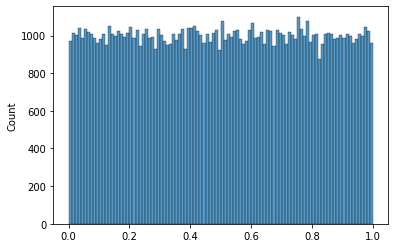

In [9]:
# generación de una muestra aleatoria con distribución de la place
a, b = 0., 1.
n = 100000
s = np.random.uniform(a, b, n)
# plt.hist( s, bins=30,  density=True)
sns.histplot( x = np.array(s), bins=100)#,   stat ='probability' )
plt.show()

Curtosis de Fisher de una distribución uniforme = -1.2  
(La distribucion normal tiene 0 de kurtosis de Fisher)

In [11]:
np.mean(s)

0.4997054767786952

In [12]:
np.std(s)

0.2886011025346767

In [10]:
kurtosis(s)   

-1.1989910558545278

Asimetría de una distribución uniforme = 0

In [13]:
skew(s)

-0.0005341538260612877

## Distribución de probabilidad uniforme

$p(x)= \frac{1}{b-a}$

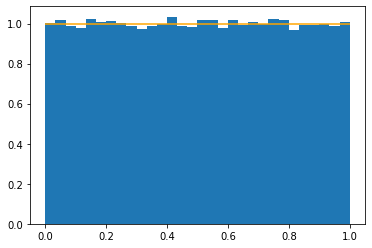

In [14]:
plt.hist( s, bins=30, density=True)   # distribución de la muestra
plt.hlines(1/(b-a), xmin=a, xmax=b, color='orange')    # distribución teórica
plt.show()

# Simulación gaussiana

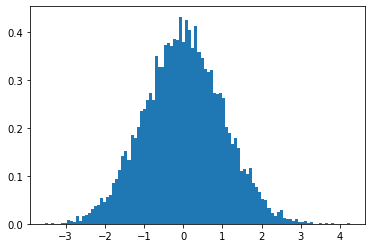

In [28]:
# generación de una muestra aleatoria con distribución normal
# mu es media y sigma std
mu, sigma = 0., 1.
s = np.random.normal(mu, sigma, 10000)
plt.hist( s, bins=100,  density=True)
plt.show()

In [29]:
# Curtosis de la distribución normal = 0
kurtosis(s), skew(s)

(-0.03758204512714203, 0.03358278766928277)

## Distribución de probabilidad gaussiana

Probability density function (pdf)

$f(x)= \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} $

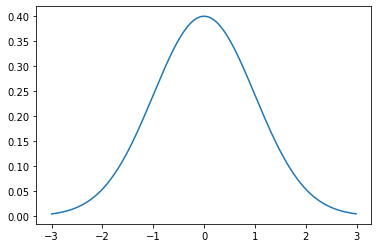

In [30]:
x = np.arange(-3., 3., .01)
pdf = 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * sigma**2) )  # función de la distribución de probabilidad de gauss
plt.plot(x, pdf)
plt.show()

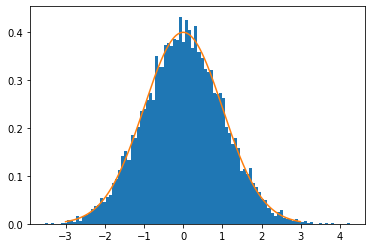

In [31]:
plt.hist( s, bins=100, density=True)
plt.plot(x, pdf)
plt.show()

# Simulación Laplace

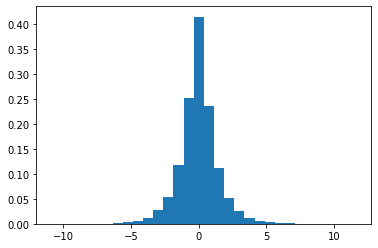

Curtosis: 2.975615112791793,
Asimetría = 0.026152759847373676


In [33]:
# generación de una muestra aleatoria con distribución de Laplace
loc, scale = 0., 1
s = np.random.laplace(loc, scale, 100000)
plt.hist( s, bins=30,  density=True)
plt.show()
print('Curtosis: {},\nAsimetría/skew = {}'.format(kurtosis(s),skew(s)))

La curtosis de la distribución laplace es 3, y la asimetría 0

## Distribución de probabilidad de Laplace

$f(x;\mu,\lambda)= \frac{1}{2\lambda}\exp({-\frac{\lvert{x-\mu}\rvert}{\lambda}}) $

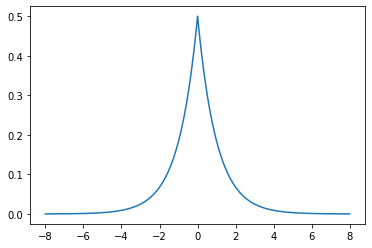

In [34]:
x = np.arange(-8., 8., .01)
pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)  # función de la distribución de probabilidad de laplace
plt.plot(x, pdf)
plt.show()

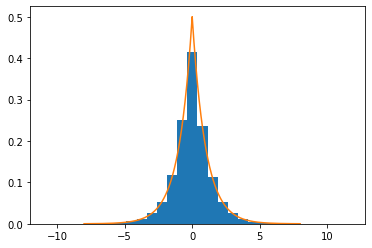

In [35]:
plt.hist( s, bins=30, density=True)
plt.plot(x, pdf)
plt.show()

# Simulación de variables estables ($\alpha$-estable de Levy)
Las distribuciones estables tienen lugar como limite de la suma de variables escalables y centradas independientes e identicamente distribuidas 
[referencia](http://www.randomservices.org/random/special/Stable.html)

Las distribuciones estables tienen 4 parametros:

* ***Estabilidad*** ($\alpha$)  con rango (0,2] mide la frecuencia de los valores extremos
* ***Sesgo/Asimetría*** ($\beta$) con rango [-1,1] Si $\beta < 0$, la distribución está sesgada a la izquierda , si  $\beta > 0$, la distribución esta sesgada a la derecha
* ***Dispersión/Escalada*** ($\sigma$)
* ***Localización*** ($\mu$)

La distribución normal es un caso especial de las distribuciones estables en que $\alpha=2$, $\beta=NA$, $\sigma=\frac{\sigma_{normal}}{\sqrt{2}}$, $\mu=0$.
La distribución normal, por otro lado es la única distribución con varianza finita dentro de las distribuciones estables.

Es importante observar que los últimos dos parámetros $\sigma$ and $\mu$, porque no corresponden inmediatamente a lo que comunmente conocemos como media y varianza.  Por ejemplo, para el caso especial de la distribución normal $~~2 \sigma^{2}_{stable} = \sigma^{2}_{normal}$.







## Caso especial: Distribución Normal

In [47]:
𝛼 =2
𝛽 = 0
𝜎_normal = 1.0
𝜇 = 0

mean, var, skw, kurt = levy_stable.stats(alpha = 𝛼, 
                                          beta = 𝛽,
                                          loc = 𝜇,
                                          scale = 𝜎_normal/np.sqrt(2),
                                          moments='mvsk')
print(mean, var, skw, kurt)

0.0 0.9999999999999998 0.0 0.0


Cambia el valor de $\beta$ en el rango permitido y oberva que no tiene ningún efecto en la linea anterior

media de la muestra generada: -0.008096473179756689
stdev de la muestra generada: 0.9809866790903355
curtosis de la muestra generada: -0.09412992320163394
asimetría de la muestra generada: -0.022865174479953232


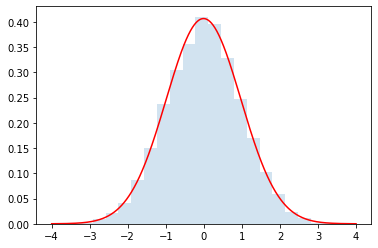

In [48]:
# Generamos una variable aleatoria gausiana como caso especial de 
# la distribución estable  

n = 10000
𝜇 = 0
𝛼 =2
𝛽 = 0
𝜎_normal = 1.0

gaussian_special_case_rvs = levy_stable.rvs(alpha=2, 
                                            beta=0, 
                                            loc=mu, 
                                            scale=𝜎_normal/np.sqrt(2), 
                                            size=n)

gaussian_mean = np.mean(gaussian_special_case_rvs)
gaussian_std = np.std(gaussian_special_case_rvs)
gaussian_kurt = kurtosis(gaussian_special_case_rvs)
gaussian_skew = skew(gaussian_special_case_rvs)
print("media de la muestra generada:", gaussian_mean)
print("stdev de la muestra generada:", gaussian_std)
print("curtosis de la muestra generada:", gaussian_kurt )
print("asimetría de la muestra generada:", gaussian_skew )

# y la comparamos con la funcion de probabilidad de la distribución normal
x_range = np.linspace(-4,4,1000)    #random.normal.rvs(loc=test_mean, scale=test_std)

plt.hist(gaussian_special_case_rvs, bins=21, density=True, alpha=.2)
plt.plot(x_range, norm.pdf(x_range, loc=gaussian_mean, scale=gaussian_std),
         color='r' )
plt.show()


## Caso especial: Distribución Cauchy

$\alpha=1$,
$\beta=0$, 
$\sigma$, 
$\mu$

In [49]:
𝛼 =1
𝛽 = 0
𝜎 = 1.0
𝜇 = 0

mean, var, skw, kurt = levy_stable.stats(alpha = 𝛼, 
                                          beta = 𝛽,
                                          loc = 𝜇,
                                          scale = 𝜎/2,
                                          moments='mvsk')
print(mean, var, skw, kurt)

nan inf nan nan


media de la muestra generada: 0.44153390458907305
stdev de la muestra generada: 48.93894002278568
curtosis de la muestra generada: 3435.935553402836
asimetría de la muestra generada: 47.60213152834553
observaciones < trimval = 15 : 98.12% 


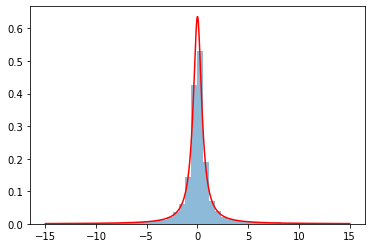

In [50]:
# Generamos una variable aleatoria cauchy como caso especial de 
# la distribución estable  

n = 10000
𝛼 =1
𝛽 = 0
𝜎 = 1.0
𝜇 = 0

cauchy_special_case_rvs = levy_stable.rvs(alpha=1, 
                                            beta=0, 
                                            loc=𝜇, 
                                            scale=𝜎/2, 
                                            size=n)

cauchy_mean = np.mean(cauchy_special_case_rvs)
cauchy_std = np.std(cauchy_special_case_rvs)
cauchy_kurt = kurtosis(cauchy_special_case_rvs)
cauchy_skew = skew(cauchy_special_case_rvs)
print("media de la muestra generada:", cauchy_mean)
print("stdev de la muestra generada:", cauchy_std)
print("curtosis de la muestra generada:", cauchy_kurt )
print("asimetría de la muestra generada:", cauchy_skew )

trimval = 15
trimndx =  abs(cauchy_special_case_rvs) < trimval
x_range = np.linspace(-trimval,trimval,1000)  
print("observaciones < trimval = {} : {:.2f}% ".format(trimval, 
                                                  sum(trimndx)/len(trimndx)*100))
plot_rvs = cauchy_special_case_rvs[trimndx]  

plt.hist(plot_rvs, bins=50, density=True, alpha=.5)
plt.plot(x_range, cauchy.pdf(x_range, loc=𝜇, scale=𝜎/2),
         color='r' )
plt.show()

## Caso especial: Distribución Levy

$\alpha=0.5$,
$\beta=1$, 
$\sigma$, 
$\mu$

In [51]:
𝛼 =0.5
𝛽 = 1
𝜎 = 1.0
𝜇 = 0

mean, var, skw, kurt = levy_stable.stats(alpha = 𝛼, 
                                          beta = 𝛽,
                                          loc = 𝜇,
                                          scale = 𝜎/2,
                                          moments='mvsk')
print(mean, var, skw, kurt)

nan inf nan nan


Cambia el valor de $\mu$ y $\sigma$ y oberva que no tiene ningún efecto en la linea anterior

media de la muestra generada: 2937.3122890419904
stdev de la muestra generada: 240140.65502237683
curtosis de la muestra generada: 9941.26794405552
asimetría de la muestra generada: 99.58742558336998
observaciones < trimval = 15 : 85.45% 


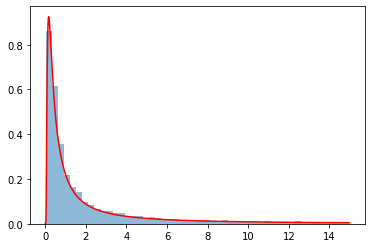

In [52]:
# Generamos una variable aleatoria levy como caso especial de 
# la distribución estable  

𝛼 =0.5
𝛽 = 1
𝜎 = 1.0
𝜇 = 0

levy_special_case_rvs = levy_stable.rvs(alpha=𝛼, 
                                            beta=𝛽, 
                                            loc=𝜇, 
                                            scale=𝜎/2, 
                                            size=n)

levy_mean = np.mean(levy_special_case_rvs)
levy_std = np.std(levy_special_case_rvs)
levy_kurt = kurtosis(levy_special_case_rvs)
levy_skew = skew(levy_special_case_rvs)
print("media de la muestra generada:", levy_mean)
print("stdev de la muestra generada:", levy_std)
print("curtosis de la muestra generada:", levy_kurt )
print("asimetría de la muestra generada:", levy_skew )

trimval = 15
trimndx =  abs(levy_special_case_rvs) < trimval
x_range = np.linspace(0,trimval,1000)  
print("observaciones < trimval = {} : {:.2f}% ".format(trimval, 
                                                  sum(trimndx)/len(trimndx)*100))
plot_rvs = levy_special_case_rvs[trimndx]  

plt.hist(plot_rvs, bins=50, density=True, alpha=.5)
plt.plot(x_range, levy.pdf(x_range, loc=𝜇, scale=𝜎/2),
         color='r' )
plt.show()